# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Import Dataset 

In [2]:
df=pd.read_csv('Liverpool_data_epl_match_details.csv')

In [3]:
df.dtypes

season                  object
contests                object
date_match              object
home_team               object
away_team               object
at_anfield                bool
Goals                    int64
Assists                  int64
Formation               object
Shots                    int64
Shots On Target          int64
Saves                    int64
Penalties won            int64
Penalties scored         int64
Crosses                  int64
Fouls                    int64
Offsides                 int64
Corners                  int64
Yellow Card              int64
Red Cards                int64
Balls touched            int64
Passes                   int64
liverpool_score         object
Interceptions            int64
Blocks                   int64
Catches                  int64
Tackles                  int64
Possession              object
Elo_Liverpool          float64
Elo_Opponent             int64
Elo_Diff               float64
Rest_Days                int64
liverpoo

#### Matchs de Liverpool du début de la saison 2012-2013 à la fin de la saison 2019-2020

In [4]:
df.head()

,season,contests,date_match,home_team,away_team,at_anfield,Goals,Assists,Formation,Shots,...,Elo_Liverpool,Elo_Opponent,Elo_Diff,Rest_Days,liverpool_score_ft,liverpool_score_ht,opponent_score_ft,opponent_score_ht,liverpool_result_ft,liverpool_result_ht
0,2012 - 2013,English Premier League,2012-08-18,West Bromwich Albion FC,Liverpool,False,0,0,4-3-3,16,...,1742.600220,1675,67.600220,6,0,0,3,1,D,D
1,2012 - 2013,English Premier League,2012-08-26,Liverpool,Manchester City,True,2,1,4-3-3,14,...,1729.251587,1918,-188.748413,3,2,1,2,0,N,V
2,2012 - 2013,English Premier League,2012-09-02,Liverpool,Arsenal FC,True,0,0,4-3-3,17,...,1733.523804,1818,-84.476196,3,0,0,2,1,D,D
3,2012 - 2013,English Premier League,2012-09-15,AFC Sunderland,Liverpool,False,1,0,4-2-3-1,23,...,1722.609009,1676,46.609009,13,1,0,1,1,N,D
4,2012 - 2013,English Premier League,2012-09-23,Liverpool,Manchester United,True,1,0,4-3-3,12,...,1732.295288,1914,-181.704712,3,1,0,2,0,D,N


In [5]:
df.tail()

,season,contests,date_match,home_team,away_team,at_anfield,Goals,Assists,Formation,Shots,...,Elo_Liverpool,Elo_Opponent,Elo_Diff,Rest_Days,liverpool_score_ft,liverpool_score_ht,opponent_score_ft,opponent_score_ht,liverpool_result_ft,liverpool_result_ht
299,2019 - 2020,English Premier League,2020-07-08,Brighton & Hove Albion,Liverpool,False,3,3,4-3-3,19,...,2002.940796,1652,350.940796,3,3,2,1,1,V,V
300,2019 - 2020,English Premier League,2020-07-11,Liverpool,Burnley FC,True,1,1,4-3-3,23,...,2005.797241,1725,280.797241,3,1,1,1,0,N,V
301,2019 - 2020,English Premier League,2020-07-15,Arsenal FC,Liverpool,False,1,1,4-3-3,24,...,1998.458008,1800,198.458008,4,1,1,2,2,D,D
302,2019 - 2020,English Premier League,2020-07-22,Liverpool,Chelsea,True,5,3,4-3-3,10,...,1986.608887,1820,166.608887,7,5,3,3,1,V,V
303,2019 - 2020,English Premier League,2020-07-26,Newcastle United FC,Liverpool,False,3,3,4-3-3,14,...,1991.137817,1686,305.137817,4,3,1,1,1,V,N


# Step 1 : Data processing and Exploration

#### On convertit le type des dates

In [6]:
df['date_match'] = pd.to_datetime(df['date_match'])

####  La journée de la saison correspondante

In [7]:
a = [i for i in range(1,39)]*8
df['matchday'] = a

#### Si Liverpool est à domicile 0

In [8]:
df['home_0_away_1'] = df['at_anfield'].apply(lambda x : 0 if x else 1)

####  Nb points gagnes

In [9]:
df['points_won'] = df['liverpool_result_ft'].apply(lambda x : 0 if x == "D" else( 1  if x == "N" else 3))

#### Conversion de la possession pour pouvoir l'utiliser

In [10]:
df['Possession']=df['Possession'].str.replace('%','')
df['Possession']=df['Possession'].astype(int)

#### Nombre de buts marqués cumulés dans la saison

In [11]:
a=pd.Series()
for i in range(0,304,38):
    a=a.append(df['Goals'][i:i+38].transform(lambda g :g.cumsum()))
df['cumulativeGoalsScored']=a

<ipython-input-11-eb93f39de044>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


#### Nombre de buts encaissés cumulés dans la saison

In [12]:
a=pd.Series()
for i in range(0,304,38):
    a=a.append(df['opponent_score_ft'][i:i+38].transform(lambda g :g.cumsum()))
df['cumulativeGoalsConceided']=a

<ipython-input-12-3951730853cf>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


### Variable prensentation
Here are all the columns of the DataSet :  

<li>season : The day of the day, during 365 days, type : str                  
<li>contests : Number of rented bikes per hour which is the target, type : int 
<li>date_match: The hour of the day, type : int
<li>home_team: Temperature per hour, type : Float
<li>away_team: Humidity in the air in %, type : int            
<li>at_anfield : Speed of the wind in m/s, type : Float
<li>Goals : Visibility in m, type : int
<li>Assists: Temperature at the beggining of the day, type : Float
<li>Formation: Sun contribution, type : Float
<li>Shots: Amount of rain in mm, type : Float
<li>Shots On Target: Amount of snow in cm, type : Float
<li>Saves: Season of the year, type : str
<li>Penalties won: If it is holiday period, type: str
<li>Penalties scored: If it is a Functioning Day, type : str
<li>Crosses: Season of the year, type : str
<li>Fouls: Season of the year, type : str
<li>Offsides: Season of the year, type : str
<li>Corners: Season of the year, type : str
<li>Yellow Card: Season of the year, type : str
<li>Red Cards: Season of the year, type : str
<li>Balls touched: Season of the year, type : str
<li>Passes: Season of the year, type : str
<li>liverpool_score: Season of the year, type : str
<li>Interceptions: Season of the year, type : str
<li>Blocks: Season of the year, type : str
<li>Catches: Season of the year, type : str
<li>Tackles: Season of the year, type : str
<li>Possession: Season of the year, type : str
<li>Elo_Liverpool: Season of the year, type : str
<li>Elo_Opponent: Season of the year, type : str
<li>Elo_Diff: Season of the year, type : str
<li>Rest_Days: Season of the year, type : str
<li>liverpool_score_ft: Season of the year, type : str
<li>liverpool_score_ht: Season of the year, type : str
<li>opponent_score_ft: Season of the year, type : str
<li>opponent_score_ht: Season of the year, type : str
<li>liverpool_result_ft: Season of the year, type : str
<li>liverpool_result_ht: Season of the year, type : str
<li>matchday: Season of the year, type : str
<li>home_0_away_1: Season of the year, type : str
<li>points_won: Season of the year, type : str
<li>cumulativeGoalsScored: Season of the year, type : str
<li>cumulativeGoalsConceided: Season of the year, type : str

    
       

### Let's look for correlations between variables

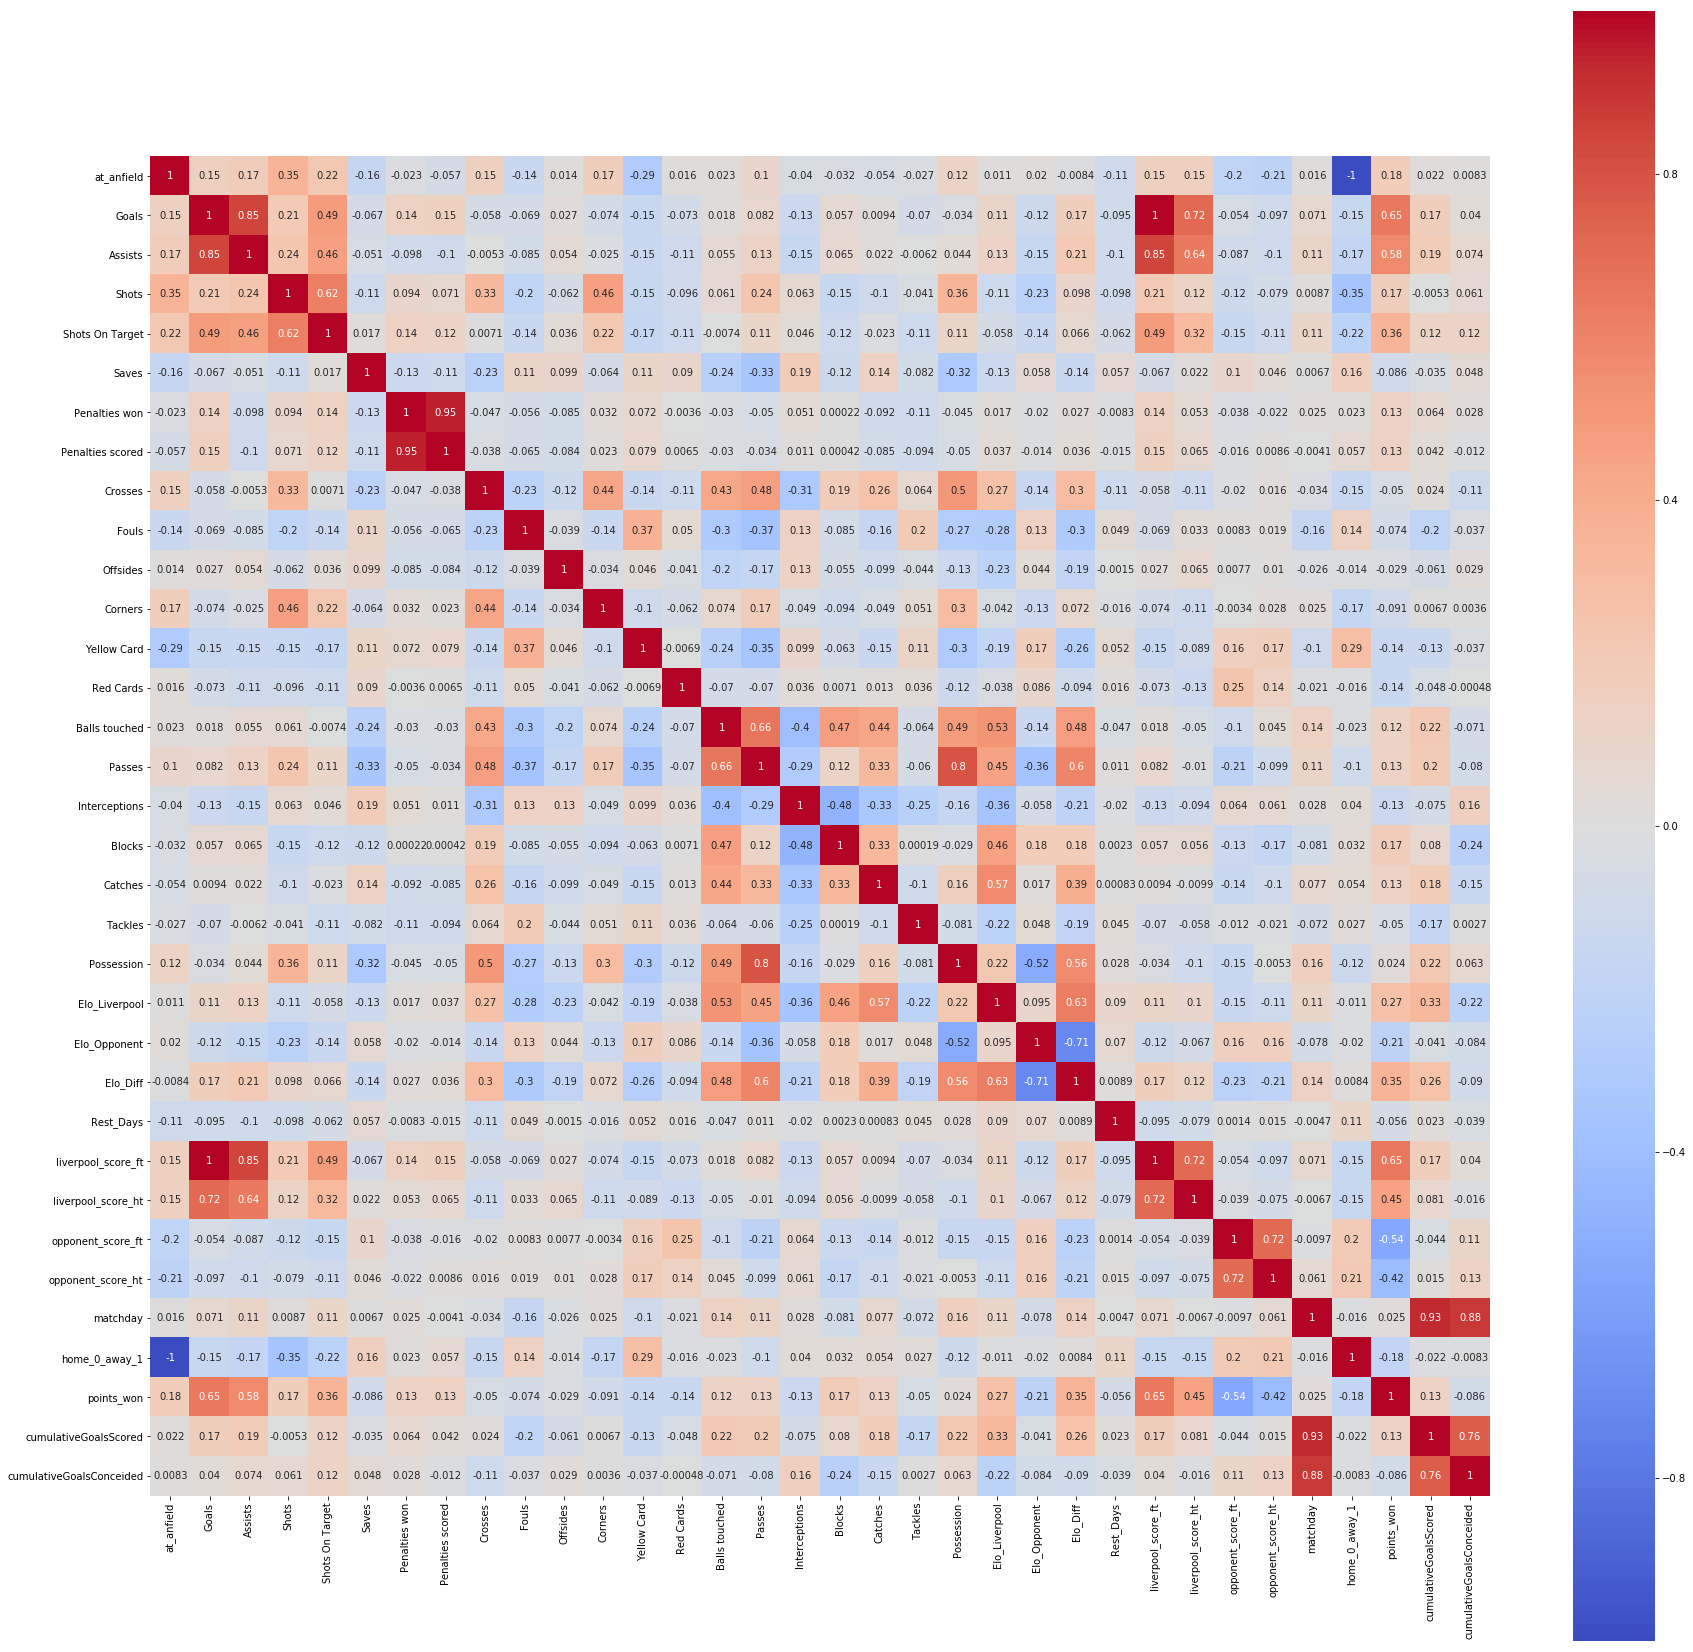

In [13]:

plt.figure(figsize=(30,30))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

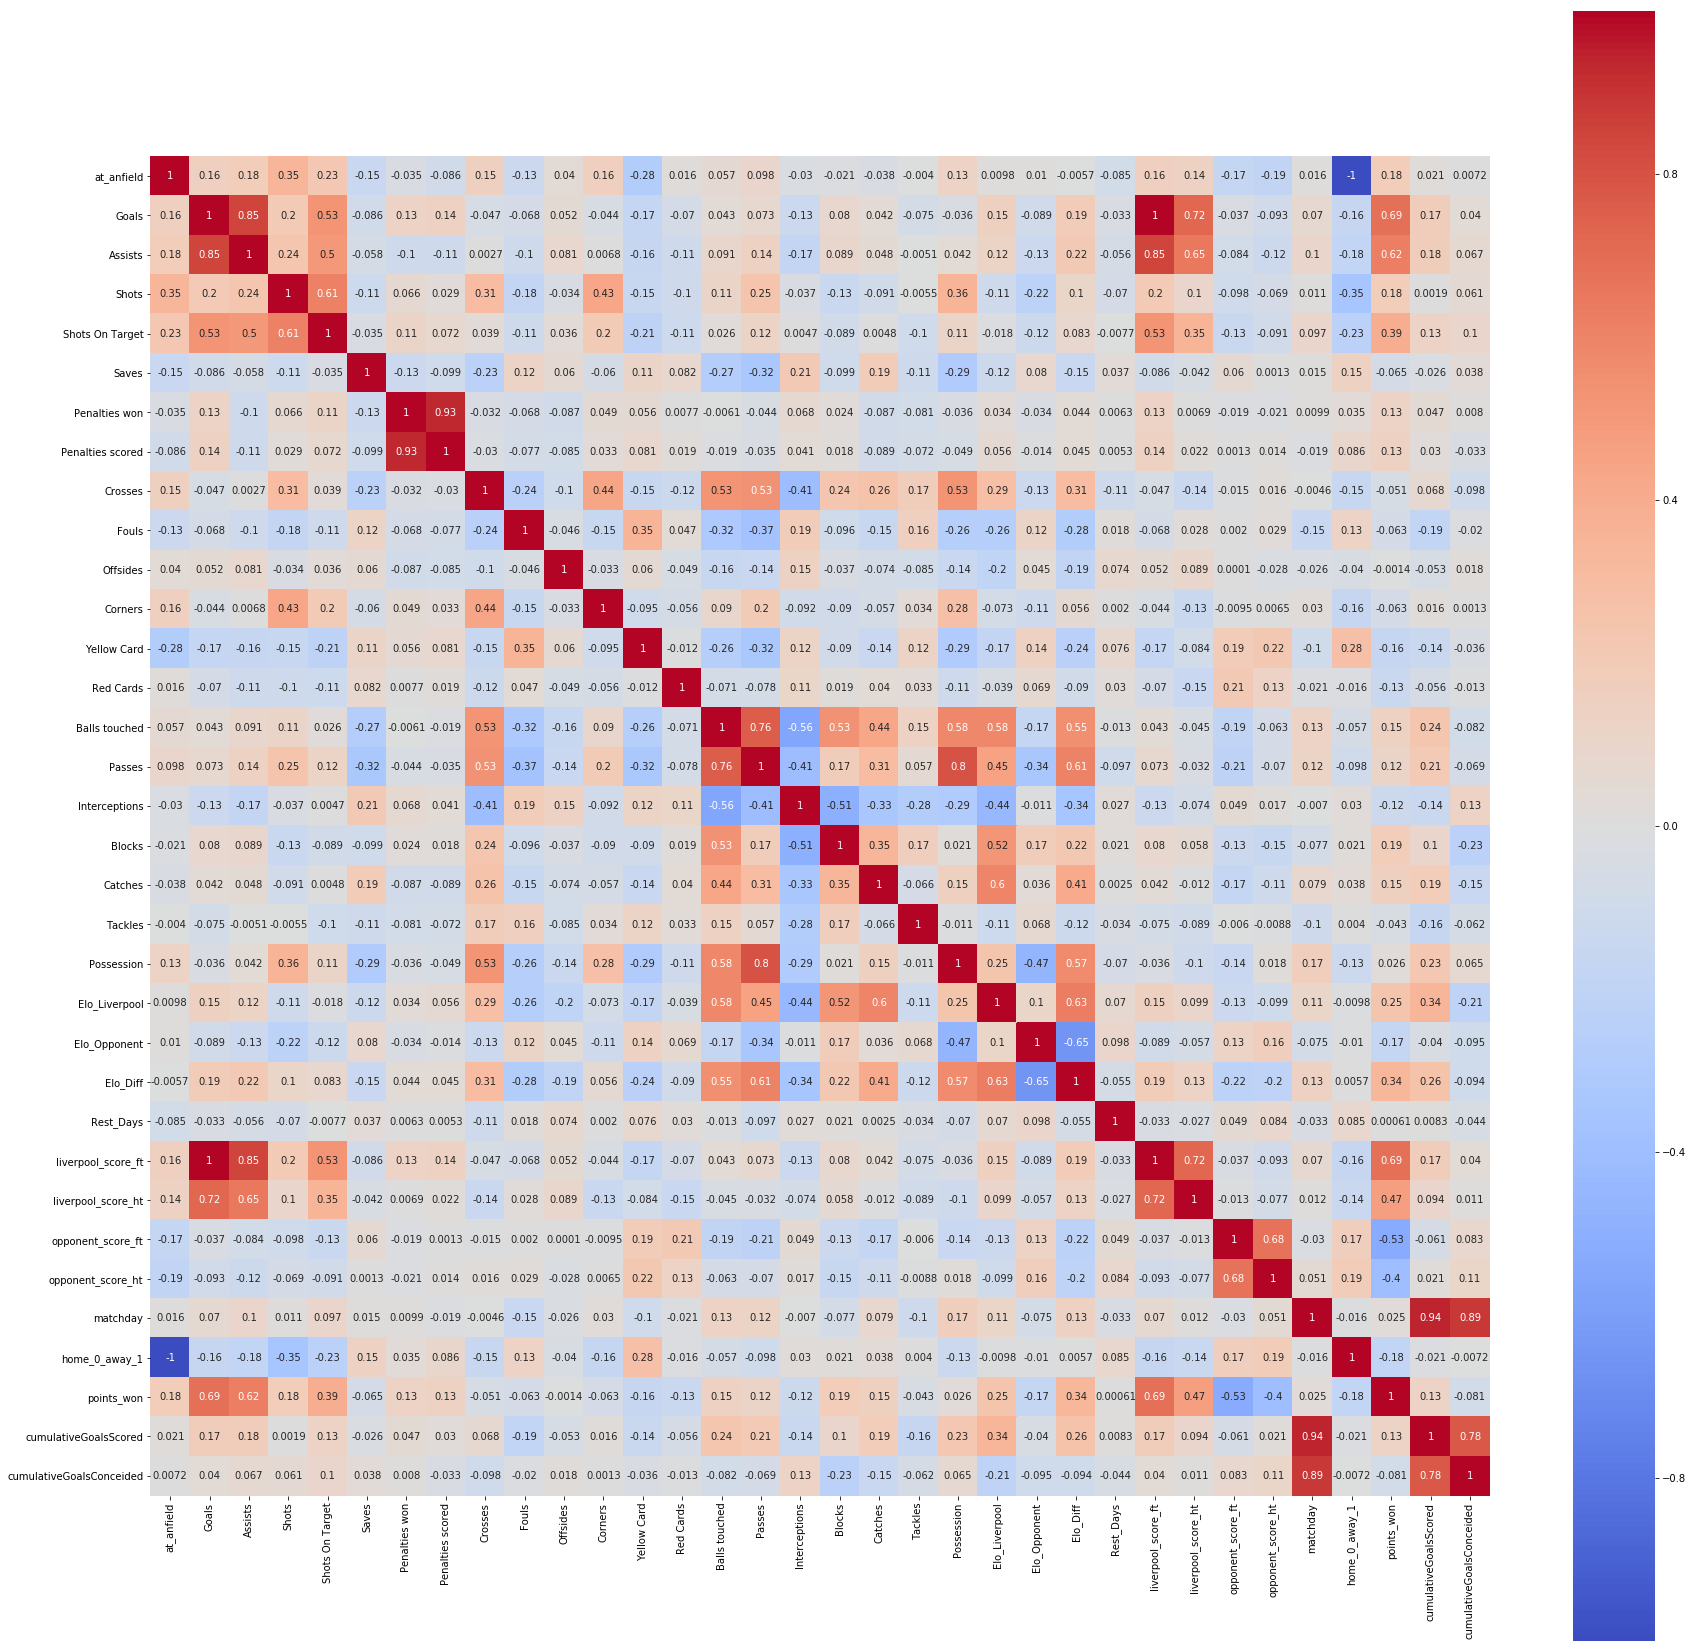

In [14]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr("spearman"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

###  Get highest correlations

In [15]:
df.corr().unstack().sort_values(ascending=False).drop_duplicates()[0:50]

cumulativeGoalsConceided  cumulativeGoalsConceided    1.000000
Penalties won             Penalties scored            0.947351
cumulativeGoalsScored     matchday                    0.928491
cumulativeGoalsConceided  matchday                    0.883519
Assists                   liverpool_score_ft          0.847131
Possession                Passes                      0.796310
cumulativeGoalsConceided  cumulativeGoalsScored       0.760541
opponent_score_ft         opponent_score_ht           0.718035
liverpool_score_ft        liverpool_score_ht          0.717166
Balls touched             Passes                      0.663868
points_won                Goals                       0.649147
Assists                   liverpool_score_ht          0.640881
Elo_Liverpool             Elo_Diff                    0.631909
Shots On Target           Shots                       0.619960
Elo_Diff                  Passes                      0.597754
points_won                Assists                     0

### target variable is point won

### features : at_anfield,Goals,Assists,Shots,Shots On Target,Saves,Crosses,Fouls,Offsides,Yellow Card,Red Cards,Balls touched ,Passes,Interceptions,Blocks,Catches,Tackles,Possession,Elo_Diff,Rest_Days

### Visualize

#### Most wins when Liverpool : have more shots on target, commit less fouls, have less yellows, less rest days

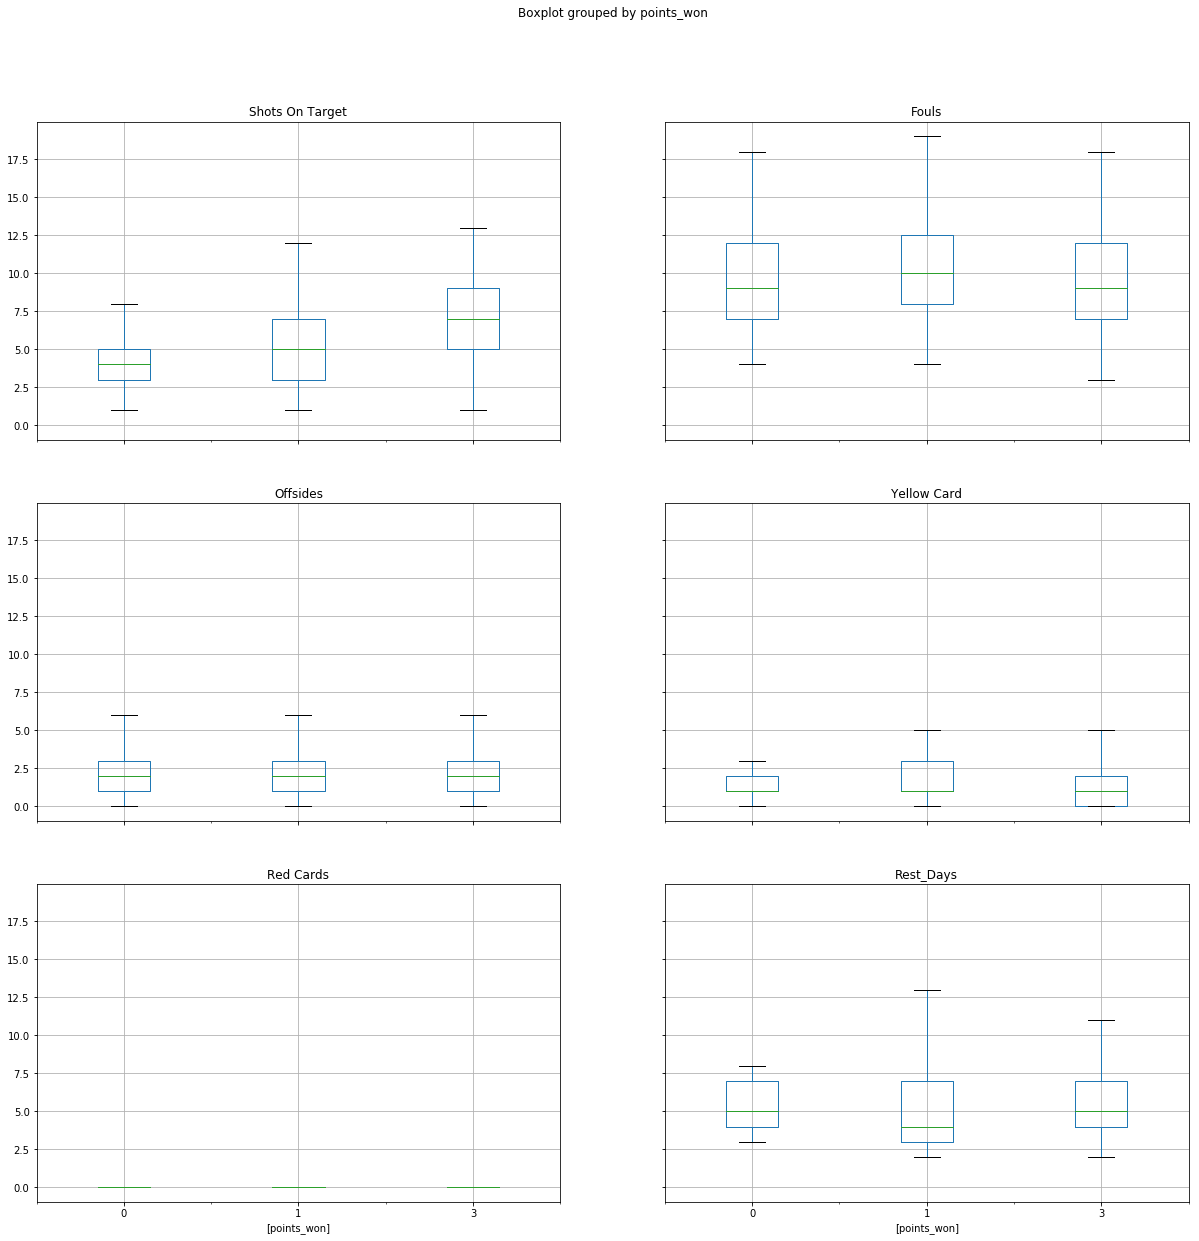

In [120]:

boxplotdf = df.boxplot(['Shots On Target',
                            'Fouls','Offsides','Yellow Card',
           'Red Cards','Rest_Days'],by=['points_won'],figsize=(20,20),showfliers=False)


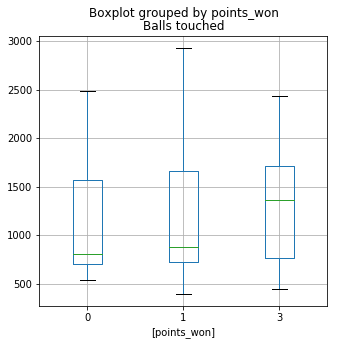

In [121]:
boxplotdf1 = df.boxplot(['Balls touched'],by=['points_won'],figsize=(5,5),showfliers=False)

#### More wins for Liverpool when they do more passes during the match and more when they have a better Elo

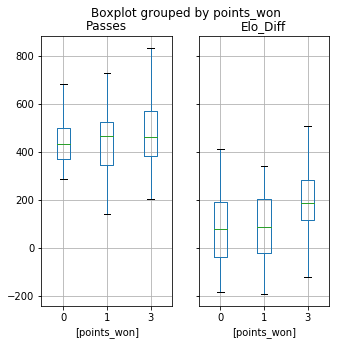

In [122]:
boxplotdf2 = df.boxplot(['Passes','Elo_Diff'],by=['points_won'],figsize=(5,5),showfliers=False)

#### More wins for Liverpool when they do less interceptions

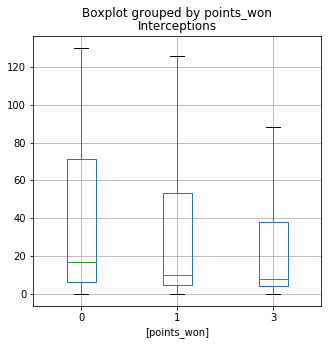

In [123]:
boxplotdf3 = df.boxplot(['Interceptions'],by=['points_won'],figsize=(5,5),showfliers=False)

#### Possession has no influence for them for the result

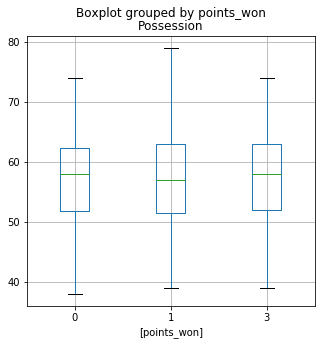

In [124]:
boxplotdf = df.boxplot(['Possession'],by=['points_won'],figsize=(5,5),showfliers=False)

#### More wins for Liverpool when they make less crosses, less shots, more blocks, less tackles

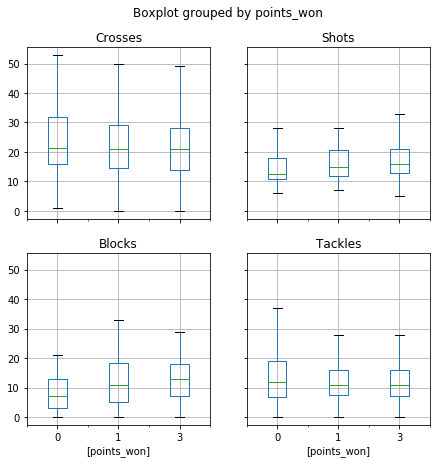

In [125]:
boxplotdf = df.boxplot(['Crosses','Shots','Blocks','Tackles'],by=['points_won'],figsize=(7,7),showfliers=False)

###  

### Let's first standartize values

In [45]:
features= ['home_0_away_1','Shots',
           'Shots On Target','Saves','Crosses','Fouls','Yellow Card',
           'Red Cards','Balls touched','Passes','Interceptions'
           ,'Tackles','Possession','Elo_Diff','Rest_Days']

In [46]:
#features= ['home_0_away_1','Goals','Assists','Shots','Shots On Target','Saves','Crosses','Fouls','Offsides','Yellow Card',
 #          'Red Cards','Balls touched','Passes','Interceptions','Blocks','Catches','Tackles','Possession','Elo_Diff','Rest_Days']

#### Separate out features

In [47]:
x=df.loc[:,features].values

#### Separate out the target

In [48]:
y=df.loc[:,['points_won']].values

#### Standartize

In [49]:
x=StandardScaler().fit_transform(x)

In [50]:
from sklearn.decomposition import PCA 

In [51]:
pca=PCA(n_components=2)

In [52]:
principalComponents=pca.fit_transform(x)

In [53]:
principalDf=pd.DataFrame(data=principalComponents,columns=['PC1','PC2'])

In [54]:
finalDf = pd.concat([principalDf, df[['points_won']]], axis = 1)

In [55]:
finalDf

,PC1,PC2,points_won
0,-2.365765,-1.323043,0
1,-2.448480,1.068524,1
2,-1.339742,0.476486,0
3,0.516750,0.256807,1
4,-2.375151,0.186018,0
5,0.821462,0.030607,3
6,0.432312,0.773263,1
7,-0.821890,1.931828,3
8,-4.297017,-0.826448,1
9,0.173389,1.668494,1


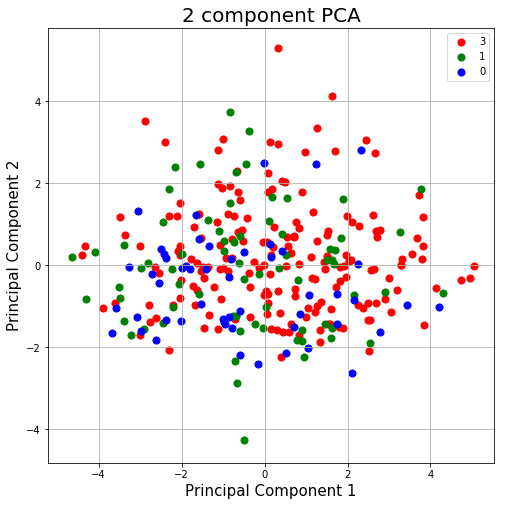

In [56]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [3, 1, 0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['points_won'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [57]:
pca.explained_variance_ratio_

array([0.26733482, 0.12495994])

In [58]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

### Other way the apply PCA

In [ ]:
sc=StandardScaler()
Z=sc.fit

In [44]:
from sklearn import decomposition
pca2=decomposition.PCA()
pca2.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
df.dtypes

season                              object
contests                            object
date_match                  datetime64[ns]
home_team                           object
away_team                           object
at_anfield                            bool
Goals                                int64
Assists                              int64
Formation                           object
Shots                                int64
Shots On Target                      int64
Saves                                int64
Penalties won                        int64
Penalties scored                     int64
Crosses                              int64
Fouls                                int64
Offsides                             int64
Corners                              int64
Yellow Card                          int64
Red Cards                            int64
Balls touched                        int64
Passes                               int64
liverpool_score                     object
Interceptio

### Random Forest

In [23]:
df.loc[0,]

season                                  2012 - 2013
contests                     English Premier League
date_match                      2012-08-18 00:00:00
home_team                   West Bromwich Albion FC
away_team                                 Liverpool
at_anfield                                    False
Goals                                             0
Assists                                           0
Formation                                     4-3-3
Shots                                            16
Shots On Target                                   2
Saves                                             4
Penalties won                                     0
Penalties scored                                  0
Crosses                                          17
Fouls                                            12
Offsides                                          4
Corners                                           3
Yellow Card                                       4
Red Cards   

In [33]:
df.dtypes

season                              object
contests                            object
date_match                  datetime64[ns]
home_team                           object
away_team                           object
at_anfield                            bool
Goals                                int64
Assists                              int64
Formation                           object
Shots                                int64
Shots On Target                      int64
Saves                                int64
Penalties won                        int64
Penalties scored                     int64
Crosses                              int64
Fouls                                int64
Offsides                             int64
Corners                              int64
Yellow Card                          int64
Red Cards                            int64
Balls touched                        int64
Passes                               int64
liverpool_score                     object
Interceptio

In [67]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,precision_recall_fscore_support

## Selection des train et test

In [34]:
Xglobal=df[(df['season']!='2018 - 2019') & ( df['season']!= '2019 - 2020')]
yglobal=df[(df['season']=='2018 - 2019') | ( df['season']== '2019 - 2020')]

Selection des features.

In [43]:
X_train=Xglobal.drop(['season','date_match','home_team','away_team','Goals','Assists','liverpool_score',
           'Penalties scored','Penalties won','liverpool_result_ft',"liverpool_score_ht",
           'opponent_score_ft','opponent_score_ht'
           ,'liverpool_score','liverpool_result_ht','points_won','liverpool_result_ft'],axis =1)

y_train=Xglobal['liverpool_result_ft']

In [44]:
X_test=yglobal.drop(['season','date_match','home_team','away_team','Goals','Assists','liverpool_score',
           'Penalties scored','Penalties won','liverpool_result_ft',"liverpool_score_ht",
           'opponent_score_ft','opponent_score_ht'
           ,'liverpool_score','liverpool_result_ht','points_won','liverpool_result_ft'],axis =1)

y_test=yglobal['liverpool_result_ft']

Colonnes de types objects

In [45]:
categorical_cols = ['Formation', 'contests']

In [46]:
model = RandomForestClassifier() # Instance du model

In [47]:
# Outil pour transformer les colonnes "object" avec la methode OneHotEncoder
col_transform = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'),categorical_cols),remainder = 'passthrough')

In [49]:
# Definition de la pipeline à envoyer au GridSearch : transformation des colonnes -> application du model
pipe = Pipeline([('trans',col_transform),('mod',model)])

In [69]:
# Hyperparametre à modifier pour le model

param = {'mod__n_estimators' : [int(x) for x in np.linspace(start=5,stop=10, num=1)], 
         'mod__max_depth' : [60,70,80,90,100],
         'mod__min_samples_split':[2,4,6,8],
         'mod__min_samples_leaf':[1,2,3,4],
         'mod__bootstrap' : [True,False]
        }

# Instanciation du GridSearch (faire attention au scoring selon le modele, different pour les classification et regresssion)
gs=GridSearchCV(pipe,param,cv=5,return_train_score=False,scoring='accuracy')

In [70]:
# Entrainement du model
gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Formation',
                                                                          'contests'])])),
                                       ('mod', RandomForestClassifier())]),
             param_grid={'mod__bootstrap': [True, False],
                         'mod__max_depth': [60, 70, 80, 90, 100],
                         'mod__min_samples_leaf': [1, 2, 3, 4],
                         'mod__min_samples_split': [2, 4, 6, 8],
                         'mod__n_estimators': [5]},
             scoring='accuracy')

In [71]:
# Affichage des résultats
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mod__bootstrap,param_mod__max_depth,param_mod__min_samples_leaf,param_mod__min_samples_split,param_mod__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
63,0.023989,0.007238,0.006803,0.002040,True,90,4,8,5,"{'mod__bootstrap': True, 'mod__max_depth': 90,...",0.652174,0.652174,0.608696,0.711111,0.622222,0.649275,0.035268,1
7,0.016202,0.001604,0.005394,0.001959,True,60,2,8,5,"{'mod__bootstrap': True, 'mod__max_depth': 60,...",0.695652,0.652174,0.543478,0.711111,0.600000,0.640483,0.061996,2
155,0.016587,0.003350,0.006021,0.001817,False,100,3,8,5,"{'mod__bootstrap': False, 'mod__max_depth': 10...",0.717391,0.652174,0.608696,0.577778,0.577778,0.626763,0.052886,3
134,0.015602,0.003322,0.005199,0.001470,False,90,2,6,5,"{'mod__bootstrap': False, 'mod__max_depth': 90...",0.673913,0.586957,0.500000,0.688889,0.666667,0.623285,0.071089,4
143,0.014600,0.002062,0.006408,0.002258,False,90,4,8,5,"{'mod__bootstrap': False, 'mod__max_depth': 90...",0.565217,0.673913,0.543478,0.600000,0.733333,0.623188,0.070650,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.016799,0.002321,0.004602,0.000795,False,60,1,2,5,"{'mod__bootstrap': False, 'mod__max_depth': 60...",0.434783,0.652174,0.478261,0.488889,0.466667,0.504155,0.076199,156
86,0.024401,0.004271,0.007000,0.000890,False,60,2,6,5,"{'mod__bootstrap': False, 'mod__max_depth': 60...",0.608696,0.586957,0.500000,0.444444,0.377778,0.503575,0.086414,157
70,0.023602,0.004227,0.006454,0.000850,True,100,2,6,5,"{'mod__bootstrap': True, 'mod__max_depth': 100...",0.543478,0.500000,0.369565,0.511111,0.577778,0.500386,0.070818,158
0,0.031107,0.006705,0.008803,0.001717,True,60,1,2,5,"{'mod__bootstrap': True, 'mod__max_depth': 60,...",0.608696,0.521739,0.260870,0.511111,0.555556,0.491594,0.120272,159


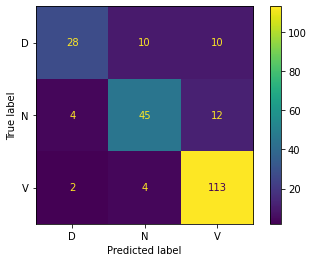

In [73]:
plot_confusion_matrix(gs.best_estimator_,X_train,y_train)
plt.show()